In [2]:
#Library imports


from nltk.corpus import stopwords

import torch

from sklearn.preprocessing import LabelEncoder


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

print("Done")

Done


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


In [4]:
# Check if CUDA is available
if torch.cuda.is_available():
    # List visible devices
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("No GPU available. Using CPU.")

GPU 0: NVIDIA GeForce GTX 1050 Ti


In [5]:
train_data = pd.read_csv(r'C:\nlp\NLP_BoilerPlates\data\train.csv')
test_data = pd.read_csv(r'C:\nlp\NLP_BoilerPlates\data\test.csv')
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
unique_locations = train_data['keyword'].unique()
print(unique_locations)


[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'displaced' 'droug

In [7]:
train_data.fillna('', inplace = True)
test_data.fillna('', inplace = True)

In [8]:
train_data

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,,,Two giant cranes holding a bridge collapse int...,1
7609,10870,,,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,,,Police investigating after an e-bike collided ...,1


In [9]:
keywordEncoder = LabelEncoder()
train_data['keyword'] = keywordEncoder.fit_transform(train_data['keyword'])
test_data['keyword'] = keywordEncoder.transform(test_data['keyword'])

locationEncoder = LabelEncoder()
train_data['location'] = locationEncoder.fit_transform(train_data['location'])
test_data['location'] = locationEncoder.fit_transform(test_data['location'])

In [10]:
def preprocessString(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)
    return s

In [11]:
train_data

,id,keyword,location,text,target
0,1,0,0,Our Deeds are the Reason of this #earthquake M...,1
1,4,0,0,Forest fire near La Ronge Sask. Canada,1
2,5,0,0,All residents asked to 'shelter in place' are ...,1
3,6,0,0,"13,000 people receive #wildfires evacuation or...",1
4,7,0,0,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,0,0,Two giant cranes holding a bridge collapse int...,1
7609,10870,0,0,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,0,0,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,0,0,Police investigating after an e-bike collided ...,1


In [12]:
import nltk

# Download the 'stopwords' corpus
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thapa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
def getVocabulory(sentenceList):
    wordList = []

    stopWords = set(stopwords.words('english'))
    
    for sentence in sentenceList:
        for word in sentence.lower().split():
            processedWord = preprocessString(word)
            if processedWord not in stopWords and processedWord != '':
                wordList.append(processedWord)

    corpus = Counter(wordList)
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}
    
    return onehot_dict

In [14]:
def preprocessData(data: pd.DataFrame, vocab = None):
    if vocab is not None:
        X_test, y_test = data.loc[:, 'text'].values, np.empty((data.shape[0], 1))
        
        new_X_test = []
        for sentence in X_test:
            new_X_test.append([vocab[preprocessString(word)] for word in sentence.lower().split() if preprocessString(word) in vocab.keys()])
        
        return new_X_test, y_test
    
    X, y = data.loc[:, 'text'].values, data.loc[:, 'target'].values
        
    X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size = .2, stratify = y)
    print(f'X_train {X_train.shape} | X_dev {X_dev.shape} | y_train {y_train.shape} | y_dev {y_dev.shape}')
    
    vocab = getVocabulory(X_train)
    
    new_X_train, new_X_dev = [], []
    
    for sentence in X_train:
        new_X_train.append([vocab[preprocessString(word)] for word in sentence.lower().split() if preprocessString(word) in vocab.keys()])
        
    for sentence in X_dev:
        new_X_dev.append([vocab[preprocessString(word)] for word in sentence.lower().split() if preprocessString(word) in vocab.keys()])
    
    return new_X_train, new_X_dev, y_train, y_dev, vocab

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
import re
from collections import Counter

In [17]:
X_train, X_dev, y_train, y_dev, vocab = preprocessData(train_data)

X_train (6090,) | X_dev (1523,) | y_train (6090,) | y_dev (1523,)


<Axes: >

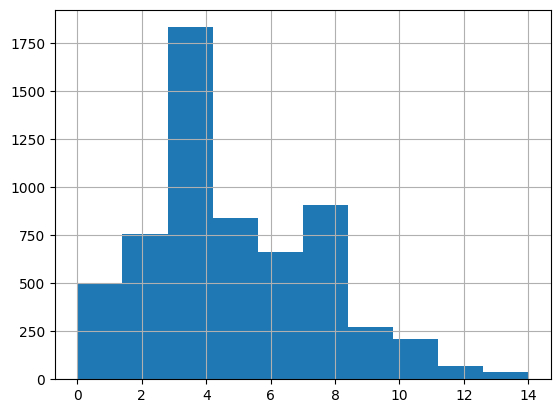

In [18]:
rev_len = [len(i) for i in X_train]
pd.Series(rev_len).hist()

In [19]:
def padding(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [20]:
X_train = padding(X_train, 15)
X_dev = padding(X_dev, 15)

In [21]:
X_train, y_train = torch.Tensor(X_train), torch.Tensor(y_train)
X_dev, y_dev = torch.Tensor(X_dev), torch.Tensor(y_dev)

In [22]:
from torch.utils.data import TensorDataset, DataLoader

In [23]:
train_dataset = TensorDataset(X_train, y_train)
dev_dataset = TensorDataset(X_dev, y_dev)

batch_size = 13

train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True, drop_last = True)
dev_dataloader = DataLoader(dev_dataset, batch_size = batch_size, drop_last = True)

In [24]:
def makeTheNet():
    class TweetDisasterRNN(nn.Module):
        def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, output_dim):
            super().__init__()

            self.no_layers = no_layers
            self.hidden_dim = hidden_dim
            self.output_dim = output_dim

            # Embedding Layer
            self.embedding = nn.Embedding(vocab_size, embedding_dim)

            # LSTM Layers
            self.lstm = nn.LSTM(
                input_size=embedding_dim,
                hidden_size=hidden_dim,
                num_layers=no_layers,
                batch_first=True,
            )

            # Dropout to reduce overfitting
            self.dropout = nn.Dropout(0.5)

            # Fully Connected Layers with BatchNorm and Dropout
            self.fc1 = nn.Linear(hidden_dim, hidden_dim)  # Reduce size to decrease complexity
            self.bn1 = nn.BatchNorm1d(hidden_dim)  # BatchNorm
            self.fc2 = nn.Linear(hidden_dim, hidden_dim)  # Further reduction
            self.bn2 = nn.BatchNorm1d(hidden_dim)
            self.output = nn.Linear(hidden_dim, output_dim)  # Final output layer

        def forward(self, x, hidden):
            # Embedding and LSTM
            x = self.embedding(x)
            x, hidden = self.lstm(x, hidden)
            x = x[:, -1, :]  # Use last output for classification
            x = self.dropout(x)  # Apply dropout

            # Fully Connected Layers with ReLU, BatchNorm, and Dropout
            x = F.relu(self.fc1(x))
            x = self.bn1(x)  # Apply batch normalization
            x = F.dropout(x, 0.5)  # Apply dropout
            
            x = F.relu(self.fc2(x))
            x = self.bn2(x)
            x = F.dropout(x, 0.5)  # Additional dropout for regularization
            
            return self.output(x), hidden  # Output layer

        def init_hidden(self, batch_size):
            # Initialize hidden states
            h0 = torch.zeros((self.no_layers, batch_size, self.hidden_dim)).to(device)
            c0 = torch.zeros((self.no_layers, batch_size, self.hidden_dim)).to(device)
            hidden = (h0, c0)
            return hidden

    # Create the model with modified layer dimensions
    net = TweetDisasterRNN(
        no_layers=3,
        hidden_dim=256,
        output_dim=1,
        embedding_dim=128,
        vocab_size=len(vocab) + 1,
    )

    # Loss function and optimizer with L2 regularization
    lossfun = nn.BCEWithLogitsLoss()  # Binary classification
    optimizer = torch.optim.Adam(net.parameters(), lr=0.0001, weight_decay=0.01)  # L2 regularization
    
    return net, lossfun, optimizer

In [25]:
from torch import nn

In [26]:
net, lossfun, optimizer = makeTheNet()
net

TweetDisasterRNN(
  (embedding): Embedding(1001, 128)
  (lstm): LSTM(128, 256, num_layers=3, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output): Linear(in_features=256, out_features=1, bias=True)
)

In [27]:
X, y = next(iter(train_dataloader))
X.shape, y.shape

(torch.Size([13, 15]), torch.Size([13]))

In [28]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [32]:
from tqdm import tqdm
import torch.nn.functional as F

In [33]:
def trainTheNet():
    clip = 5
    epochs = 100
    
    net, lossfun, optimizer = makeTheNet()
    net.to(device)
    
    trainAcc = []
    trainLoss = []
    devAcc = []
    devLoss = []
    
    yTrue, yPred = [], []
    
    for epochi in tqdm(range(epochs)):
        batchAcc = []
        batchLoss = []
        
        h = net.init_hidden(batch_size)
        
        net.train()
        
        for X, y in train_dataloader:
            X, y = X.to(device, dtype=torch.int), y.to(device)
            h = tuple([each.data for each in h])
            yHat, h = net(X, h)
            yHat = yHat.squeeze()
            loss = lossfun(yHat, y)
            
            batchAcc.append(100*torch.mean(((yHat.cpu() > .0) == y.cpu()).float()))
            batchLoss.append(loss.item())
            
            optimizer.zero_grad()
            loss.backward()
            
            nn.utils.clip_grad_norm_(net.parameters(), clip)
            optimizer.step()
        
        trainAcc.append(np.mean(batchAcc))
        trainLoss.append(np.mean(batchLoss))
        
        net.eval()
        
        with torch.no_grad():
            
            h = net.init_hidden(batch_size)
        
            batchAcc = []
            batchLoss = []

            for X, y in dev_dataloader:
                X, y = X.to(device, dtype=torch.int), y.to(device)
                h = tuple([each.data for each in h])
                yHat, h = net(X, h)
                yHat = yHat.squeeze()
                loss = lossfun(yHat, y)
                
                yPred.extend(yHat.cpu() > .0)
                yTrue.extend(y.cpu())

                batchAcc.append(100*torch.mean(((yHat.cpu() > .0) == y.cpu()).float()))
                batchLoss.append(loss.item())

            devAcc.append(np.mean(batchAcc))
            devLoss.append(np.mean(batchLoss))
        
    return trainAcc, devAcc, trainLoss, devLoss, net, yTrue, yPred

In [34]:
trainAcc, devAcc, trainLoss, devLoss, net, yTrue, yPred = trainTheNet()

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [15:25<00:00,  9.25s/it]


In [39]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

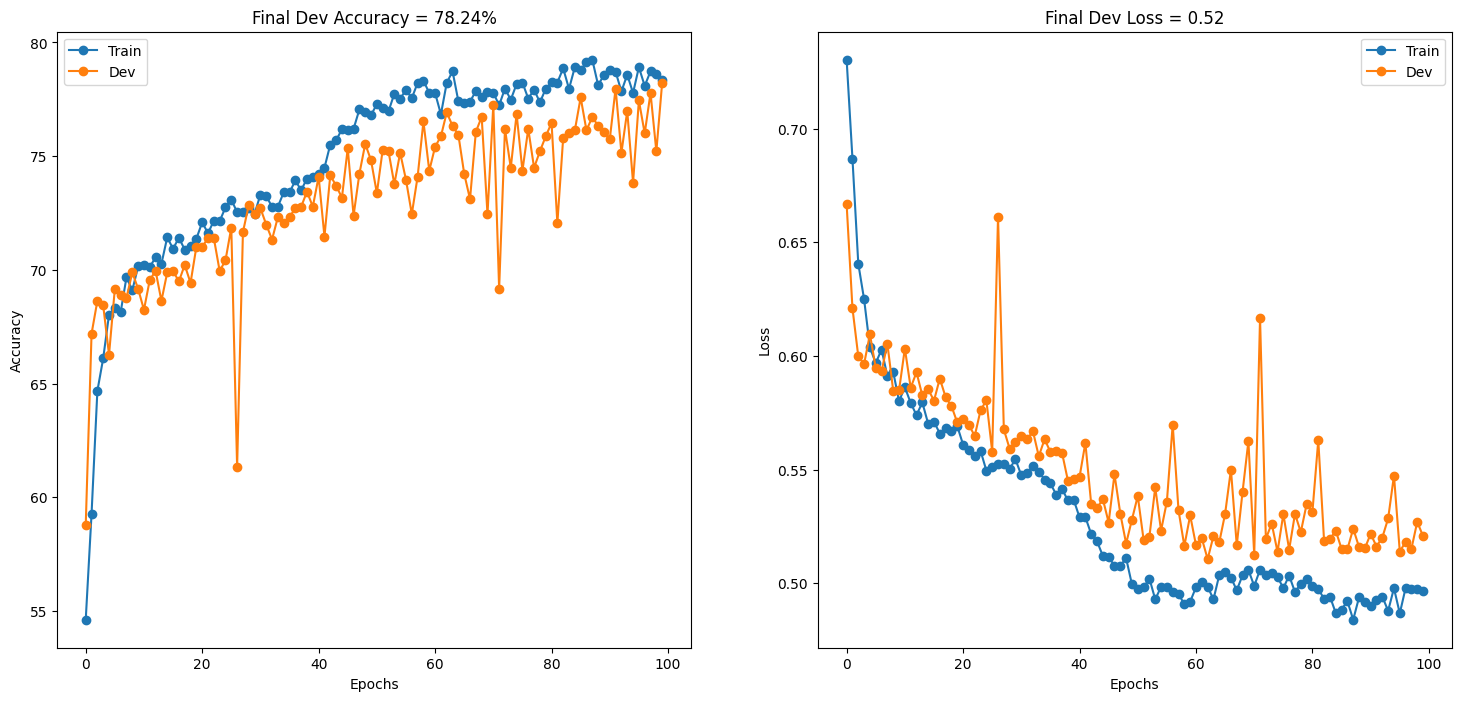

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))

ax[0].plot(trainAcc, 'o-', label = 'Train')
ax[0].plot(devAcc, 'o-', label = 'Dev')
ax[0].set_title(f'Final Dev Accuracy = {devAcc[-1]:.2f}%')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(trainLoss, 'o-', label = 'Train')
ax[1].plot(devLoss, 'o-', label = 'Dev')
ax[1].set_title(f'Final Dev Loss = {devLoss[-1]:.2f}')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()

In [41]:
cm = confusion_matrix(yTrue, yPred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=cmap, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'confusion_matrix' is not defined